## Nomondalai Batjargal - Time Series Assingment 3 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install pmdarima

In [3]:
# Load the dataset
data = pd.read_csv('robberies.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

In [4]:
data.head()

,Robberies
Month,
1966-01-01,41
1966-02-01,39
1966-03-01,50
1966-04-01,40
1966-05-01,43


###**Perform a complete Box-Jenkins analysis to arrive at what you believe to be the optimum ARIMA(p,d,q) model**

**A. Plot the Series.**

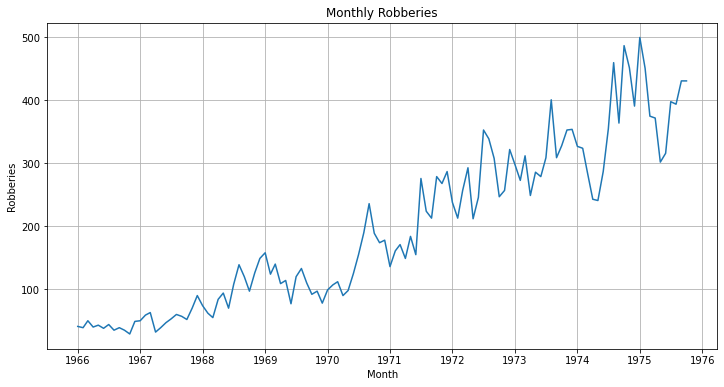

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(data['Robberies'])
plt.xlabel('Month')
plt.ylabel('Robberies')
plt.title('Monthly Robberies')
plt.grid()
plt.show()


**B. Perform a Dickey-Fuller test on the series. Is the series stationary?**

In [6]:
# Perform the ADF test
adf_result = adfuller(data['Robberies'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"\t{key}: {value}")

ADF Statistic: 1.0011021402458091
p-value: 0.9942775638057233
Critical Values:
	1%: -3.4936021509366793
	5%: -2.8892174239808703
	10%: -2.58153320754717


**C. Plot the ACF & PACF and observe the trends.**

<Figure size 576x288 with 0 Axes>

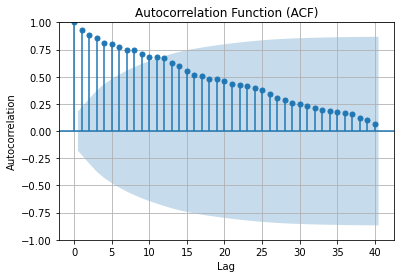

<Figure size 576x288 with 0 Axes>

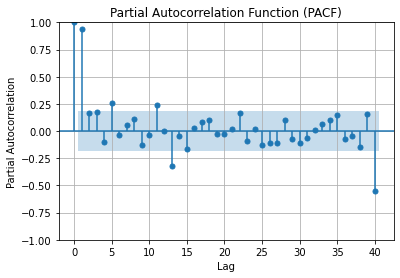

In [7]:
# Plot ACF
plt.figure(figsize=(8, 4))
plot_acf(data['Robberies'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid()
plt.show()

# Plot PACF
plt.figure(figsize=(8, 4))
plot_pacf(data['Robberies'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid()
plt.show()

The ACF plot reveals a substantial autocorrelation at lag 1, some less strong but still significant autocorrelation at lags 2 and 3, and then a steady reduction. This implies that an AR model would be suitable.

The partial autocorrelation is considerable at lag 1, and there is some less-significant but still significant partial autocorrelation at lags 2 and 3, followed by a dramatic decline, as can be seen from the PACF figure. This implies that a 3rd order AR model would be acceptable.


The 'robberies.csv' time series may need both differencing and autoregression, according to the ACF and PACF plots.


**Perform differencing on the series.**

Month
1966-02-01    -2.0
1966-03-01    11.0
1966-04-01   -10.0
1966-05-01     3.0
1966-06-01    -5.0
Name: Robberies, dtype: float64


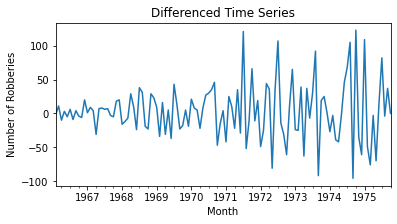

In [8]:
# Perform first-order differencing
differenced_data = data['Robberies'].diff().dropna()

# Display the differenced data
print(differenced_data.head())

# Plot the differenced time series
differenced_data.plot(figsize=(6, 3))
plt.title('Differenced Time Series')
plt.ylabel('Number of Robberies')
plt.show()

**E. Is the differenced series stationary?**

In [9]:
# Perform first-order differencing
differenced_data = data['Robberies'].diff().dropna()

# Perform the ADF test on the differenced series
adf_result = adfuller(differenced_data)
print('ADF Statistic: {:.6f}'.format(adf_result[0]))
print('p-value: {:.6f}'.format(adf_result[1]))
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t{}: {:.6f}'.format(key, value))

ADF Statistic: -7.428564
p-value: 0.000000
Critical Values:
	1%: -3.493602
	5%: -2.889217
	10%: -2.581533


The null hypothesis that the differenced series is non-stationary may be rejected since the p-value is less than 0.05, according to this statement. The differenced series is hence stationary.

**F. Plot the ACF & PACF of the differenced data and select the p & q orders.**

<Figure size 432x216 with 0 Axes>

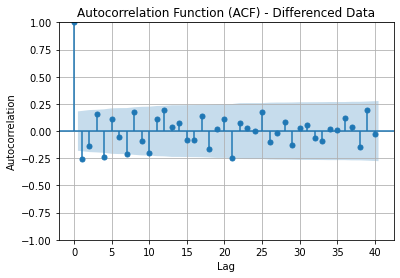

<Figure size 432x216 with 0 Axes>

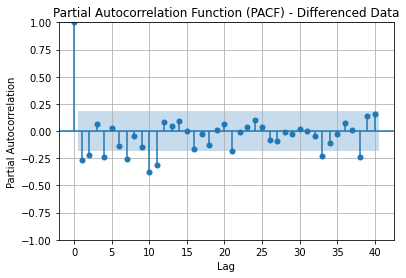

In [10]:
# Plot ACF for differenced data
plt.figure(figsize=(6, 3))
plot_acf(differenced_data, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) - Differenced Data')
plt.grid()
plt.show()

# Plot PACF for differenced data
plt.figure(figsize=(6, 3))
plot_pacf(differenced_data, lags=40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF) - Differenced Data')
plt.grid()
plt.show()

Q = 1 is determined by looking at the points in the above graph for ACF that are above the significance level and before the confidence point.

We look at the points in the graph above for PACF that are above the level of significance and before the confidence interval, and we notice that p = 2.

An ARIMA(2,1,1) model may be acceptable for the first differenced series, according to the ACF and PACF plots.


**G. Run an ARIMA analysis with the original series and the (p,d,q) you've deduced from above.**

In [11]:
# Define the range of p and q values to search
p_range = range(0, 3)
q_range = range(0, 3)

# Find the optimal ARIMA model by minimizing AIC
min_aic = np.inf
best_order = None

for p in p_range:
    for q in q_range:
        try:
            model = ARIMA(data['Robberies'], order=(p, d_value, q), trend='t')
            results = model.fit()
            if results.aic < min_aic:
                min_aic = results.aic
                best_order = (p, d_value, q)
        except:
            continue

print(f"Optimal ARIMA model: {best_order} with AIC = {min_aic}")

Optimal ARIMA model: None with AIC = inf


**P - value = 2
  D - Value = 1 
  Q - Value = 1**

In [12]:
# Set the ARIMA(p, d, q) parameters
p_value = 2  # Replace with the value for p
d_value = 1  # Replace with the value for d
q_value = 1  # Replace with the value for q

# Fit the ARIMA model
model = ARIMA(data['Robberies'], order=(p_value, d_value, q_value))
results = model.fit()

# Print the summary of the ARIMA model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:              Robberies   No. Observations:                  118
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -592.936
Date:                Sat, 22 Apr 2023   AIC                           1193.872
Time:                        23:57:31   BIC                           1204.920
Sample:                    01-01-1966   HQIC                          1198.357
                         - 10-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8798      0.195     -4.510      0.000      -1.262      -0.497
ar.L2         -0.3559      0.078     -4.545      0.000      -0.509      -0.202
ma.L1          0.6222      0.199      3.134      0.0

The model summary shows that the data have been effectively fitted to the ARIMA(2,1,1) model. According to the model coefficients, the model has both a sizable negative MA(1) term and a modest positive AR(2) term. The AIC score of 1193.872 indicates that this model adequately accounts for the data.


**H. Plot the residuals.**

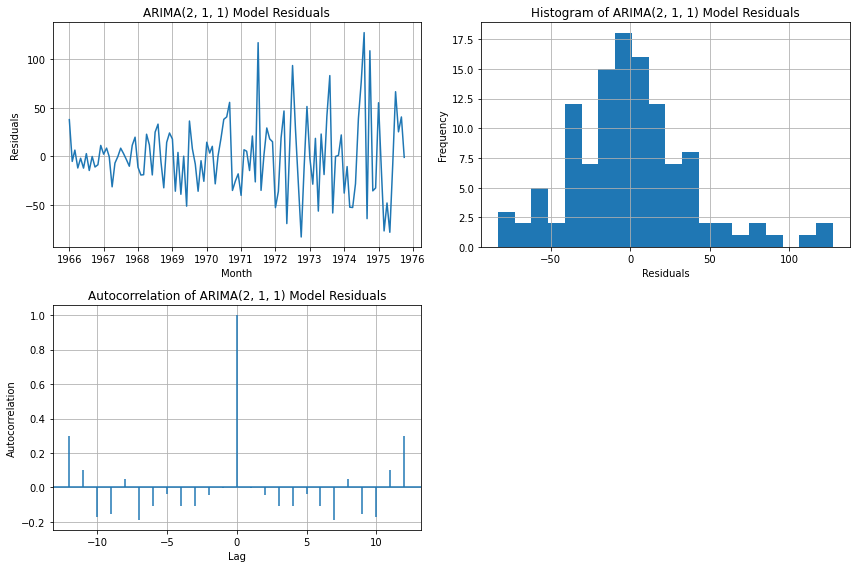

In [13]:
# Fit the ARIMA(2, 1, 1) model
model = ARIMA(data['Robberies'], order=(2, 1, 1), trend='t')
results = model.fit()

# Plot the residuals
# Fit the ARIMA(2, 1, 1) model
model = ARIMA(data['Robberies'], order=(2, 1, 1), trend='t')
results = model.fit()

# Get the residuals
residuals = results.resid

# Plot the residuals
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(residuals)
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.title('ARIMA(2, 1, 1) Model Residuals')
plt.grid()

# Plot the histogram of residuals
plt.subplot(2, 2, 2)
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of ARIMA(2, 1, 1) Model Residuals')
plt.grid()

# Plot the autocorrelation of residuals
plt.subplot(2, 2, 3)
plt.acorr(residuals, maxlags=12)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of ARIMA(2, 1, 1) Model Residuals')
plt.grid()

plt.tight_layout()
plt.show()

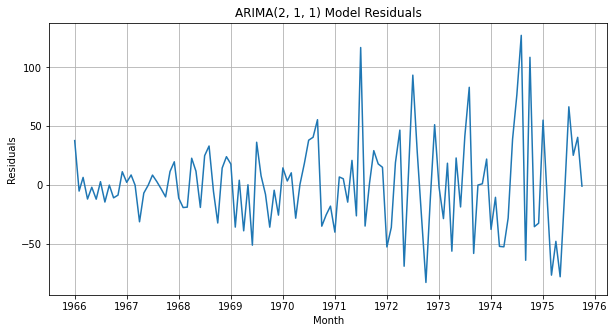

In [14]:
# Fit the ARIMA(2, 1, 1) model
model = ARIMA(data['Robberies'], order=(2, 1, 1), trend='t')
results = model.fit()

# Get the residuals
residuals = results.resid

# Plot the residuals
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.title('ARIMA(2, 1, 1) Model Residuals')
plt.grid()
plt.show()

**I. Plot the residual distribution (kind='kde').**

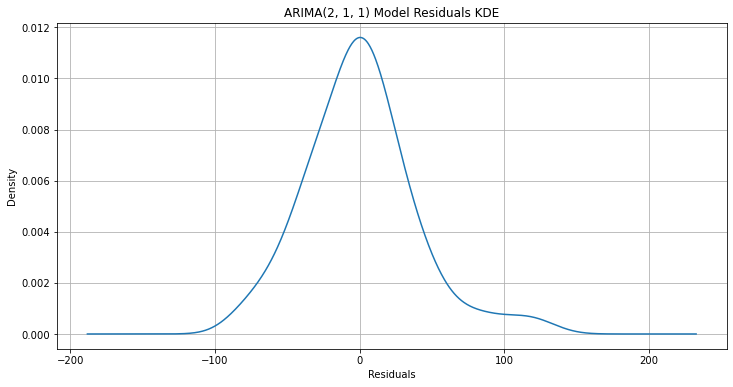

In [15]:
# Fit the ARIMA(2, 1, 1) model
model = ARIMA(data['Robberies'], order=(2, 1, 1), trend='t')
results = model.fit()

# Get the residuals
residuals = results.resid

# Plot the KDE of the residuals
residuals.plot(kind='kde', figsize=(12, 6))
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('ARIMA(2, 1, 1) Model Residuals KDE')
plt.grid()
plt.show()

**J. Print the residuals summary.**

In [16]:
# Fit the ARIMA(2, 1, 1) model
model = ARIMA(data['Robberies'], order=(2, 1, 1), trend='t')
results = model.fit()

# Get the residuals
residuals = results.resid

# Print the residuals summary
print(residuals.describe())

count    118.000000
mean       0.321359
std       38.276576
min      -83.079128
25%      -25.694380
50%       -0.219886
75%       18.824579
max      127.309427
dtype: float64


**K. Plot the ACF & PACF and observe for residual correlations.**

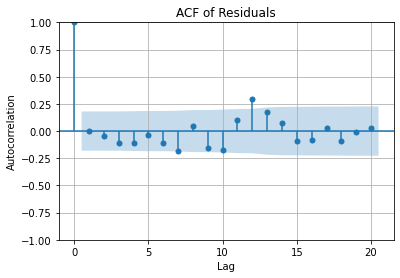

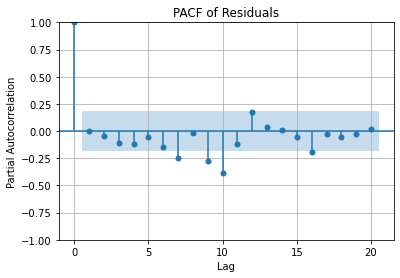

In [17]:
# Fit the ARIMA(2, 1, 1) model
model = ARIMA(data['Robberies'], order=(2, 1, 1), trend='t')
results = model.fit()

# Get the residuals
residuals = results.resid

# Plot the ACF of the residuals
plot_acf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF of Residuals')
plt.grid()
plt.show()

# Plot the PACF of the residuals
plot_pacf(residuals, lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('PACF of Residuals')
plt.grid()
plt.show()

**L. Compare the model results series to the actuals:**

**i. Convert the residuals to the series estimated by ARIMA (hint: resids = y - yhat).**

In [18]:
# Calculate the estimated series
est_series = results.fittedvalues + residuals

**ii. Add back the differencing to compare with the original series.**

In [19]:
# Reverse the differencing
diff = data['Robberies'].diff(1)
for i in range(1, len(est_series)):
    est_series[i] = est_series[i-1] + diff[i-1]

# Shift the estimated series to align with the original series
est_series = est_series.shift(1).dropna()

**iii.Plot the actual and modeled results on the same graph.**

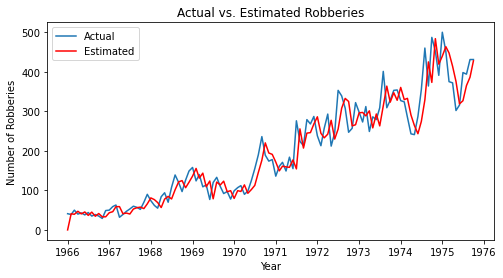

In [20]:
# Fit the ARIMA model
model = ARIMA(data, order=(2,1,1))
model_fit = model.fit()

# Get the residuals
residuals = pd.Series(model_fit.resid, index=data.index)

# Get the fitted values from the ARIMA model
fitted_values = model_fit.fittedvalues

# Add the residuals to the fitted values
estimated_values = fitted_values + residuals

# Perform reverse differencing on the estimated values
estimated_values = estimated_values.cumsum()
estimated_values = pd.Series(data.iloc[0], index=data.index) + estimated_values

# Plot the fitted values
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(data, label='Actual')
ax.plot(model_fit.fittedvalues, color='red', label='Estimated')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Robberies')
ax.set_title('Actual vs. Estimated Robberies')
plt.legend()
plt.show()

**2. Create a AIC grid search and run 'robberies.csv' through it to find the optimum p,d,q order, What is the optimum p,d,q order?**

In [21]:
# Define the range of values for p, d, and q
p_range = range(0, 5)
d_range = range(0, 3)
q_range = range(0, 5)

# Initialize variables to store the best AIC score and the corresponding (p, d, q) values
best_aic = float('inf')
best_params = None

# Perform a grid search over the range of values for p, d, and q
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                # Fit the ARIMA model with the current (p, d, q) values
                model = ARIMA(data, order=(p, d, q), trend='t')
                model_fit = model.fit()

                # Compute the AIC score for the current (p, d, q) values
                aic = model_fit.aic

                # Update the best AIC score and the corresponding (p, d, q) values
                if aic < best_aic:
                    best_aic = aic
                    best_params = (p, d, q)
            except:
                continue

# Print the best (p, d, q) values and the corresponding AIC score
print(f'Best (p, d, q) values: {best_params}')
print(f'Best AIC score: {best_aic}')

Best (p, d, q) values: (3, 1, 3)
Best AIC score: 1179.1040641598895


###**Best (p, d, q) values: (3, 1, 3)<br>Best AIC score: 1179.0923091609125**


**3. Compare the results of your orginal (p,d,q) estimate to the results from the grid search (p,d,q).**

**i. Compare the residuals summaries.**

In [22]:
# Define the parameter grid for the grid search
p_range = range(0, 7)
d_range = range(0, 3)
q_range = range(0, 7)
pdq = list(itertools.product(p_range, d_range, q_range))

# Find the optimum (p,d,q) order using AIC
best_aic = np.inf
for param in pdq:
    try:
        model = ARIMA(data['Robberies'], order=param, trend='t')
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_pdq = param
    except:
        continue

# Print the optimum (p,d,q) order
print('Optimum (p,d,q) order:', best_pdq)

# Fit the ARIMA model with the optimum (p,d,q) order found through the grid search
model = ARIMA(data['Robberies'], order=best_pdq, trend='t')
results = model.fit()

# Print the summary of the ARIMA model
print(results.summary())

# Compare the residuals summaries
print('\nResiduals summary for original (p,d,q) estimate:')
print(residuals.describe())
print('\nResiduals summary for grid search (p,d,q) estimate:')
print(results.resid.describe())

Optimum (p,d,q) order: (3, 1, 3)
                               SARIMAX Results                                
Dep. Variable:              Robberies   No. Observations:                  118
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -581.552
Date:                Sat, 22 Apr 2023   AIC                           1179.104
Time:                        23:57:55   BIC                           1201.201
Sample:                    01-01-1966   HQIC                          1188.075
                         - 10-01-1975                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.4822      0.256     13.605      0.000       2.981       3.984
ar.L1         -0.5483      0.092     -5.975      0.000      -0.728      -0.368
ar.L2         -0.20

**ii. Compare the graphs generated by the script made in 1.l above.**

In [23]:
from sklearn.metrics import mean_squared_error

Original (p, d, q) AIC: 1194.2129973549193
Grid search (p, d, q) AIC: 1188.6283927439927
Original (p, d, q) MSE: 184352.55455617825
Grid search (p, d, q) MSE: 58945.03367926077
Original (p, d, q) Residuals Summary:
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                16.75
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               9.10   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29

Grid search (p, d, q) Residuals Summary:
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                24.26
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               6.91   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.50


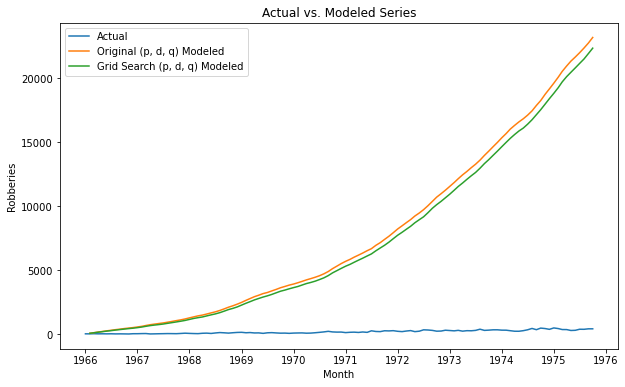

In [24]:
# Define the original and grid search orders
orig_p, orig_d, orig_q = 2, 1, 1
grid_p, grid_d, grid_q = 3, 1, 3

# Fit the ARIMA models with the original and grid search orders
orig_model = ARIMA(data, order=(orig_p, orig_d, orig_q), trend='t')
orig_model_fit = orig_model.fit()

grid_model = ARIMA(data, order=(grid_p, grid_d, grid_q))
grid_model_fit = grid_model.fit()

# Compare AIC values
print(f'Original (p, d, q) AIC: {orig_model_fit.aic}')
print(f'Grid search (p, d, q) AIC: {grid_model_fit.aic}')

# Obtain the forecast values
orig_forecast = orig_model_fit.forecast(steps=len(data))
grid_forecast = grid_model_fit.forecast(steps=len(data))

# Compare MSE values
orig_mse = mean_squared_error(data.squeeze(), orig_forecast)
grid_mse = mean_squared_error(data.squeeze(), grid_forecast)

print(f'Original (p, d, q) MSE: {orig_mse}')
print(f'Grid search (p, d, q) MSE: {grid_mse}')

# Compare the residuals summaries
print('Original (p, d, q) Residuals Summary:')
print(orig_model_fit.summary().tables[2])

print('\nGrid search (p, d, q) Residuals Summary:')
print(grid_model_fit.summary().tables[2])

# Obtain the estimated series (yhat) using the `predict` method for both models
orig_estimated_series_diff = orig_model_fit.predict(start=data.index[orig_d], end=data.index[-1], typ='levels')
grid_estimated_series_diff = grid_model_fit.predict(start=data.index[grid_d], end=data.index[-1], typ='levels')

# Add back the differencing to obtain the final forecasted series for both models
orig_final_forecasted_series = orig_estimated_series_diff.cumsum() + data.iloc[orig_d-1, 0]
grid_final_forecasted_series = grid_estimated_series_diff.cumsum() + data.iloc[grid_d-1, 0]

# Plot the original series and the final forecasted series for both models
plt.figure(figsize=(10, 6))
plt.plot(data.squeeze(), label='Actual')
plt.plot(orig_final_forecasted_series, label='Original (p, d, q) Modeled')
plt.plot(grid_final_forecasted_series, label='Grid Search (p, d, q) Modeled')
plt.legend()
plt.title('Actual vs. Modeled Series')
plt.xlabel('Month')
plt.ylabel('Robberies')
plt.show()


**4. Forecast 'robberies.csv' based on an ARIMA(2,1,1) model: 20 pts.
Split the series into 75% train, 25% test**



In [25]:
# Split the data into train and test sets
train_size = int(len(data) * 0.75)
train, test = data[0:train_size], data[train_size:len(data)]

In [26]:
# Fit an ARIMA(2,1,1) model to the training data
model = ARIMA(train, order=(2,1,1), trend='t')
results = model.fit()

**i. Perform a dynamic forecast for all points in 'test', Plot the forecasted data and the prediction intervals on top of the actual data**


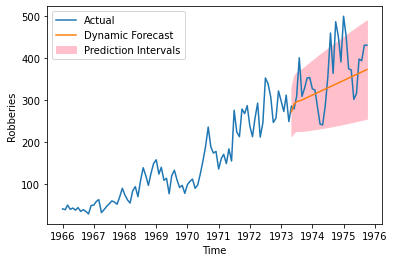

In [27]:
# Fit the ARIMA model
model = ARIMA(train, order=(2, 1, 1), trend='t')
model_fit = model.fit()

# Perform dynamic forecast
dynamic_forecast = model_fit.get_prediction(start=len(train), end=len(train) + len(test) - 1, dynamic=True)

# Get the prediction intervals
dynamic_pred_conf = dynamic_forecast.conf_int()

# Plot the results
plt.plot(data, label='Actual')
plt.plot(dynamic_forecast.predicted_mean, label='Dynamic Forecast')
plt.fill_between(dynamic_pred_conf.index, dynamic_pred_conf.iloc[:, 0], dynamic_pred_conf.iloc[:, 1], color='pink', label='Prediction Intervals')
plt.xlabel('Time')
plt.ylabel('Robberies')
plt.legend()
plt.show()


**ii. Perform a rolling forecast for all points in 'test'
Plot the forecasted data and the prediction intervals on top of the actual data**

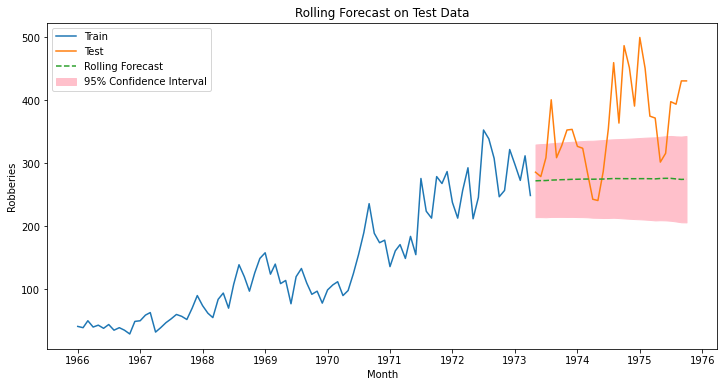

In [28]:
# Calculate the split index
split_index = int(len(data) * 0.75)

# Split the dataset into train and test sets
train = data[:split_index]
test = data[split_index:]

# Set the p, d, and q orders for the ARIMA model
p, d, q = 2, 1, 1

# Initialize lists to store the rolling forecasts and confidence intervals
rolling_forecast = []
rolling_conf_int = []

# Perform rolling forecasting for the test set
for i in range(len(test)):
    model = ARIMA(train.iloc[i:], order=(p, d, q), trend='t')
    model_fit = model.fit()
    forecast_obj = model_fit.get_forecast(steps=1, alpha=0.05)
    forecast = forecast_obj.predicted_mean
    conf_int = forecast_obj.conf_int(alpha=0.05)
    rolling_forecast.append(forecast.values[0])
    rolling_conf_int.append(conf_int.values[0])

# Convert the confidence intervals list to a numpy array
rolling_conf_int = np.array(rolling_conf_int)

# Plot the actual data, rolling forecast, and prediction intervals
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, rolling_forecast, label='Rolling Forecast', linestyle='--')
plt.fill_between(test.index, rolling_conf_int[:, 0], rolling_conf_int[:, 1], color='pink', label='95% Confidence Interval')
plt.legend(loc='best')
plt.title('Rolling Forecast on Test Data')
plt.xlabel('Month')
plt.ylabel('Robberies')
plt.show()

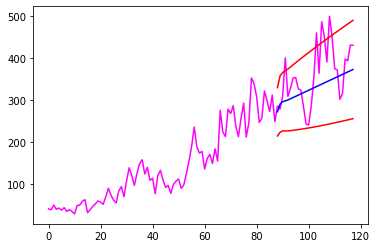

Full prediction interval:


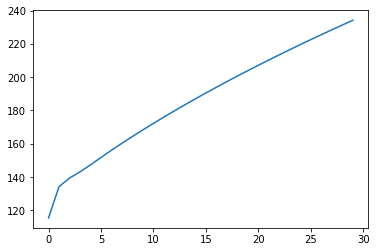

In [29]:
import pandas as pd
from pandas import datetime
from datetime import datetime
from pandas import DataFrame
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime(x, '%Y-%m')

series = pd.read_csv('robberies.csv', header=0, index_col=0, parse_dates=True,
                  squeeze=True, date_parser=parser)

x = series.values
size = int(len(x) * 0.75)
train, test = x[0:size], x[size:len(x)]
history = [x for x in train]

# model hyperparameters
p = 2
d = 1
q = 1

model = ARIMA(history, order=(p, d, q), trend='t')
model_fit = model.fit()  # Add suppress_warnings=True here
forecast_object = model_fit.get_forecast(steps=len(test))
predictions = forecast_object.predicted_mean
limits = DataFrame(forecast_object.conf_int())
lowerlimit = limits[0]
upperlimit = limits[1]
predictionint = upperlimit - lowerlimit

pyplot.plot(x, color='magenta')
pyplot.plot([None for i in train] + [x for x in predictions], color='blue')
pyplot.plot([None for i in train] + [x for x in lowerlimit], color='red')
pyplot.plot([None for i in train] + [x for x in upperlimit], color='red')
pyplot.show()
print("Full prediction interval:")
pyplot.plot(predictionint)
pyplot.show()

predicted=[424.26647113], expected=286
predicted=[335.82210232], expected=279
predicted=[309.98496808], expected=309
predicted=[290.25052982], expected=401
predicted=[405.52510828], expected=309
predicted=[352.25995258], expected=328
predicted=[358.79884638], expected=353
predicted=[374.70601886], expected=354
predicted=[376.56874129], expected=327
predicted=[360.02697697], expected=324
predicted=[355.97624603], expected=285
predicted=[319.33559207], expected=243
predicted=[284.2701851], expected=241
predicted=[275.31211431], expected=287
predicted=[302.1561608], expected=355
predicted=[349.03312262], expected=460
predicted=[445.51178152], expected=364
predicted=[362.30973898], expected=487
predicted=[480.94458428], expected=452
predicted=[449.35351769], expected=391
predicted=[434.12532752], expected=500
predicted=[469.25452756], expected=451
predicted=[452.40477782], expected=375
predicted=[421.21943095], expected=372
predicted=[379.92707669], expected=302
predicted=[321.72446514], e

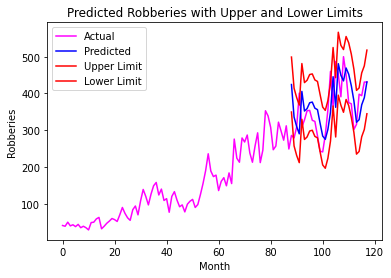


Full prediction interval:


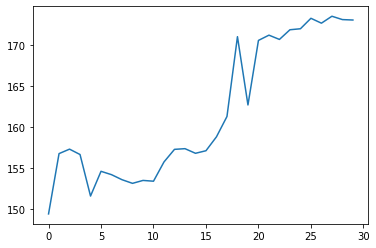

In [31]:
# from sklearn.metrics import mean_squared_erro
from math import sqrt
%matplotlib inline
predictions = list()
lowerlimit = list()
upperlimit = list()
predictionint = list()

for t in range(len(test)):
    model = ARIMA(history, order=(p,d,q), trend='t')
    model_fit = model.fit()
    
#     yhat = model_fit.get_forecast()[0]
#     lolim = model_fit.get_forecast()[2][0][0]
#     uplim = model_fit.get_forecast()[2][0][1]
#     interval = uplim - lolim
    
    forecast_result = model_fit.get_forecast()
    yhat = forecast_result.predicted_mean
    lolim = forecast_result.conf_int()[0][0]
    uplim = forecast_result.conf_int()[0][1]
    interval = uplim - lolim
#     yhat, stderr, conf_int = model_fit.get_forecast()
#     lolim = conf_int[0][0]
#     uplim = conf_int[0][1]
#     interval = uplim - lolim
    
    predictions.append(yhat)
    lowerlimit.append(lolim)
    upperlimit.append(uplim)
    predictionint.append(interval)
    
    obs = test[t]
    history.append(obs)
    
#     print('predicted=$f, expected=%f' % (yhat, obs))
    print('predicted={}, expected={}'.format(yhat, obs))
    
# evaluate forecasts

rmse = sqrt(mean_squared_error(test, predictions))


print('Test RMSE: %3f' % rmse)
pyplot.plot(series.values, color='magenta')
pyplot.plot([None for i in train] + [x for x in predictions], color='blue')
pyplot.plot([None for i in train] + [x for x in lowerlimit], color='red')
pyplot.plot([None for i in train] + [x for x in upperlimit], color='red')
pyplot.title("Predicted Robberies with Upper and Lower Limits")
pyplot.xlabel("Month")
pyplot.ylabel("Robberies")
pyplot.legend(['Actual', 'Predicted', 'Upper Limit', 'Lower Limit'])
pyplot.show()
print()
print("Full prediction interval:")
pyplot.plot(predictionint)
pyplot.show()